In [1]:
import caffe
caffe.set_mode_cpu()
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
from keras.datasets import mnist


Using TensorFlow backend.


Preprocess dataset.

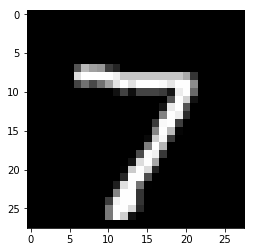

In [2]:
data = mnist.load_data()[1][0]
# Normalize data.
data = data / data.max()
plt.imshow(data[0, :, :])

Reshape the data so it fits into the caffe net.

In [3]:
seven = data[0, :, :]
print(seven.shape)
seven = seven[np.newaxis, ...]
print(seven.shape)


(28, 28)
(1, 28, 28)


In Caffe the inference model is often seperate from the model for training and suffixed wit `_deploy`. It ususally has an `Input layer` that can be freely filled with data, instead of a `Data layer` with a fixed dataset.

Load the trained model and check that the inference is correct.

In [6]:
model_def = 'example_caffe_mnist_model_deploy.prototxt'
model_weights = 'mnist.caffemodel'
deploy_net = caffe.Net(model_def,
                       model_weights,
                       caffe.TEST)
deploy_net.blobs

OrderedDict([('data', <caffe._caffe.Blob at 0x7fcfbf777ea0>),
             ('conv2d_1', <caffe._caffe.Blob at 0x7fcfbf777608>),
             ('max_pooling2d_1', <caffe._caffe.Blob at 0x7fcfbf777500>),
             ('conv2d_2', <caffe._caffe.Blob at 0x7fcfbf777660>),
             ('dropout_1', <caffe._caffe.Blob at 0x7fcfbf74b6b8>),
             ('dense_1', <caffe._caffe.Blob at 0x7fcfbf74b7c0>),
             ('dropout_2', <caffe._caffe.Blob at 0x7fcfbf74b710>),
             ('dense_2', <caffe._caffe.Blob at 0x7fcfbf7b4768>),
             ('prob', <caffe._caffe.Blob at 0x7fcfbf7b46b8>)])

In [14]:
deploy_net.blobs['data'].data[...] = seven
output = deploy_net.forward()
output['prob'][0].argmax()

7